 #### Coded by: Vikranth

In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from collections import Counter
%matplotlib notebook

In [595]:
dar2 = pd.read_csv('/Users/vikranth/Typing_Participants/Participant_3_20171208/acc_right/ar3.csv',header=None)
dar3 = pd.read_csv('/Users/vikranth/Typing_Participants/Participant_3_20171208/acc_right/ar4.csv',header=None)
dgr2 = pd.read_csv('/Users/vikranth/Typing_Participants/Participant_3_20171208/gyro_right/gr3.csv',header=None)
dgr3 = pd.read_csv('/Users/vikranth/Typing_Participants/Participant_3_20171208/gyro_right/gr4.csv',header=None)


In [596]:
temp = np.zeros(dar2.shape)
temp = dgr2.values[25:,:]
dgr2 = pd.DataFrame(temp)
print(dgr2)

                  0           1          2          3          4
0      1.512749e+12 -21600000.0   3.356934  -0.915527   1.449585
1      1.512749e+12 -21600000.0   3.952026  -1.235962   1.083374
2      1.512749e+12 -21600000.0   2.655029  -1.464844   0.442505
3      1.512749e+12 -21600000.0   1.724243  -2.655029   0.473022
4      1.512749e+12 -21600000.0  -0.228882  -1.220703   0.610352
5      1.512749e+12 -21600000.0  -1.022339  -0.610352   0.686646
6      1.512749e+12 -21600000.0  -0.259399  -0.381470   0.686646
7      1.512749e+12 -21600000.0  -0.381470  -0.381470   0.656128
8      1.512749e+12 -21600000.0   2.822876  -1.647949   1.129150
9      1.512749e+12 -21600000.0   1.892090  -1.388550   1.083374
10     1.512749e+12 -21600000.0  -3.326416  -0.030518   0.671387
11     1.512749e+12 -21600000.0  -2.334595   0.213623   0.747681
12     1.512749e+12 -21600000.0   0.976562   0.289917   1.281738
13     1.512749e+12 -21600000.0   2.029419   0.091553   1.403809
14     1.512749e+12 -2160

In [597]:
dgr2.shape

(74120, 5)

In [598]:
dar = pd.concat([dar2,dar3])
dgr = pd.concat([dgr2,dgr3])

In [599]:
dr = pd.concat([dar[[0,2,3,4]], dgr[dgr.columns[2:5]]],axis = 1)
dr.columns = ['time' ,'arx', 'ary', 'arz', 'grx', 'gry', 'grz']
dr

,time,arx,ary,arz,grx,gry,grz
0,1512748797998,-0.294800,0.166626,0.953247,3.356934,-0.915527,1.449585
1,1512748797999,-0.296265,0.187134,0.947754,3.952026,-1.235962,1.083374
2,1512748798004,-0.298950,0.167969,0.950073,2.655029,-1.464844,0.442505
3,1512748798116,-0.287964,0.190308,0.954102,1.724243,-2.655029,0.473022
4,1512748798118,-0.293335,0.175171,0.953735,-0.228882,-1.220703,0.610352
5,1512748798120,-0.291992,0.180298,0.953003,-1.022339,-0.610352,0.686646
6,1512748798236,-0.287476,0.182129,0.955322,-0.259399,-0.381470,0.686646
7,1512748798237,-0.292480,0.174683,0.950806,-0.381470,-0.381470,0.656128
8,1512748798239,-0.289429,0.169678,0.955444,2.822876,-1.647949,1.129150
9,1512748798359,-0.286255,0.198120,0.952637,1.892090,-1.388550,1.083374


In [600]:
dal2 = pd.read_csv('/Users/vikranth/Typing_Participants/Participant_3_20171208/acc_left/al3.csv',header=None)
dal3 = pd.read_csv('/Users/vikranth/Typing_Participants/Participant_3_20171208/acc_left/al4.csv',header=None)
dal = pd.concat([dal2,dal3])
dgl2 = pd.read_csv('/Users/vikranth/Typing_Participants/Participant_3_20171208/gyro_left/gl3.csv',header=None)
dgl3 = pd.read_csv('/Users/vikranth/Typing_Participants/Participant_3_20171208/gyro_left/gl4.csv',header=None)
dgl = pd.concat([dgl2,dgl3])

In [601]:
dl = pd.concat([dal[[0,2,3,4]], dgl[dgl.columns[2:5]]],axis = 1)
dl.columns = ['time' ,'alx', 'aly', 'alz', 'glx', 'gly', 'glz']
dl

,time,alx,aly,alz,glx,gly,glz
0,1512748797098,0.098877,0.055786,0.908203,269.790649,15.243530,88.043213
1,1512748797105,0.032593,-0.101074,1.012695,111.419678,20.568848,62.606812
2,1512748797106,0.014404,-0.250000,1.018066,38.238525,25.344849,59.127808
3,1512748797107,0.018799,-0.273804,1.004761,33.096313,20.294189,58.166504
4,1512748797108,-0.010620,-0.399658,1.075073,19.256592,12.344360,47.576904
5,1512748797108,-0.022339,-0.365112,1.094849,18.936157,15.075684,39.962769
6,1512748797216,-0.040771,-0.327881,1.123413,21.774292,23.086548,27.328491
7,1512748797217,-0.073853,-0.276245,1.175537,22.674561,32.226562,17.822266
8,1512748797218,-0.124023,-0.207153,1.116455,4.959106,50.964355,10.620117
9,1512748797341,-0.194824,-0.176880,0.968628,2.136230,62.423706,12.588501


In [608]:
def preprocess_data(df):
    # Plot to visualize missing values
    l = len(df)
    plt.figure()
    plt.plot(df.values[:,0],np.ones((l,1)),'r.', ms=0.1)
    plt.show()
    
    thresh = 5000
    
    flag = np.diff(df.values[:,0])
    points = np.where(flag > thresh)
    Counter(flag)
    
    points=np.append(points[0],l-1) #Appending the last value
    print(points)
    
    prev = 0
    delta = 40
    new_t = []
    for point in points:
        time_diff = (df['time'].iloc[point] - df['time'].iloc[prev])/(point-prev)
        new_t.append((np.arange(df['time'].iloc[prev], df['time'].iloc[point] + time_diff-1 , time_diff)))
        prev = point+1
    new_t = np.concatenate( new_t, axis=0 )
    constant_t = (np.arange(new_t[0], new_t[-1] , delta))
    
    print(new_t.shape)
    print(constant_t.shape)
    print(new_t[-1])
    print(constant_t[-1])
    print(df[df.columns[1:7]].shape)
    
    f = interpolate.interp1d(new_t, df[df.columns[1:7]], axis =0)
    df_new = f(constant_t)
    print(df_new.shape)
    
    plt.figure()
    plt.plot(constant_t, df_new[:,2])
    plt.show()
    
    missing_data = np.zeros((len(constant_t),1))
    points = np.where(flag > thresh)
    for point in points[0]:
        missing_data[np.where((constant_t> df['time'].iloc[point]) & (constant_t<df['time'].iloc[point+1]))] = 1
    #plt.figure()
    plt.plot(constant_t, missing_data)
    plt.show()
    
    return constant_t, df_new, missing_data

<IPython.core.display.Javascript object>


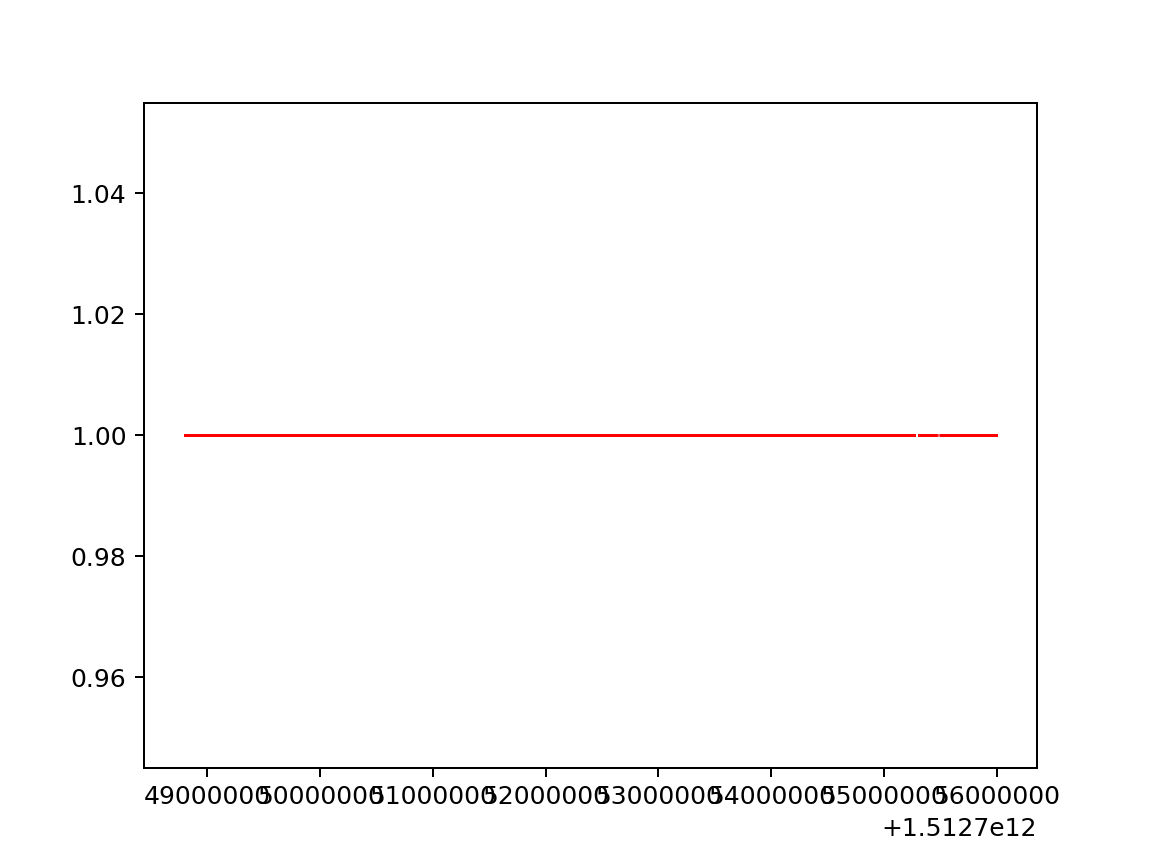

[ 55007  55221  57521  63148  63242  70535 111662 111700 113645 122891]
(122892,)
(179962,)
1512755995556.5676
1512755995538.0
(122892, 6)
(179962, 6)


<IPython.core.display.Javascript object>


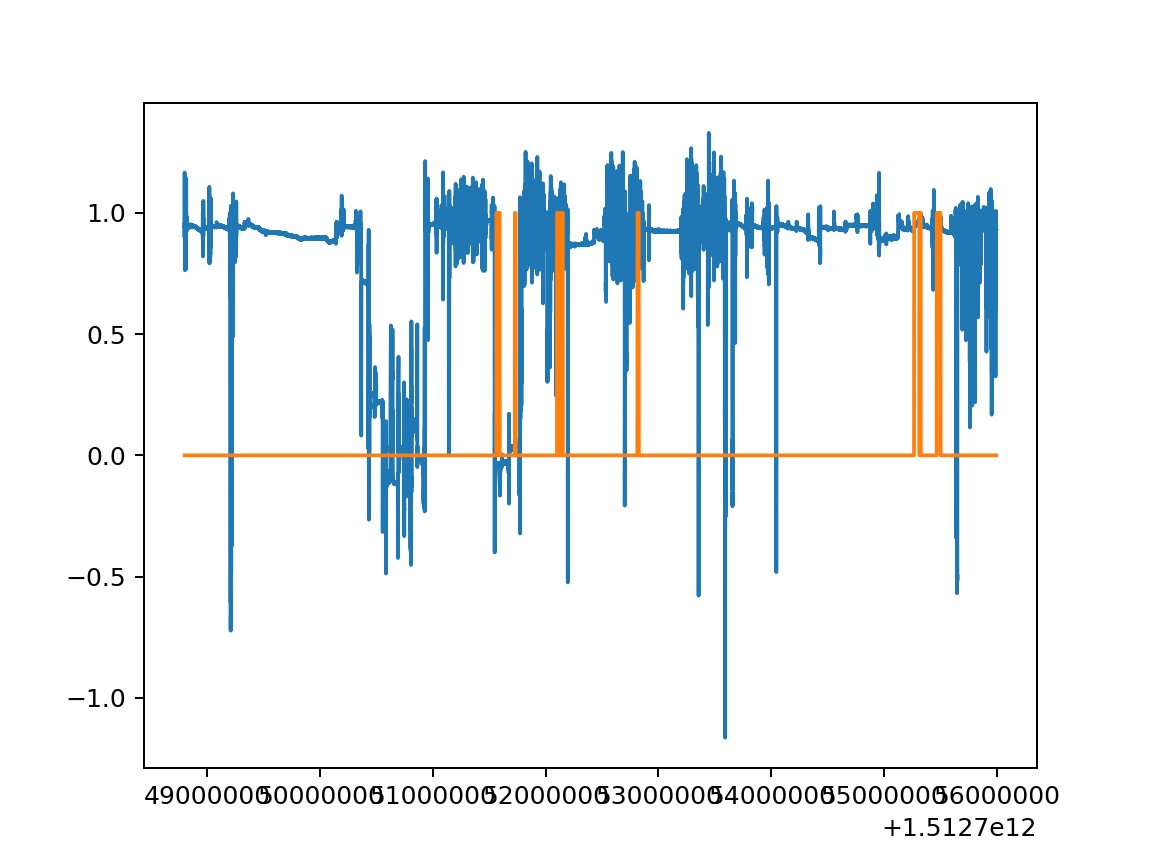

<IPython.core.display.Javascript object>


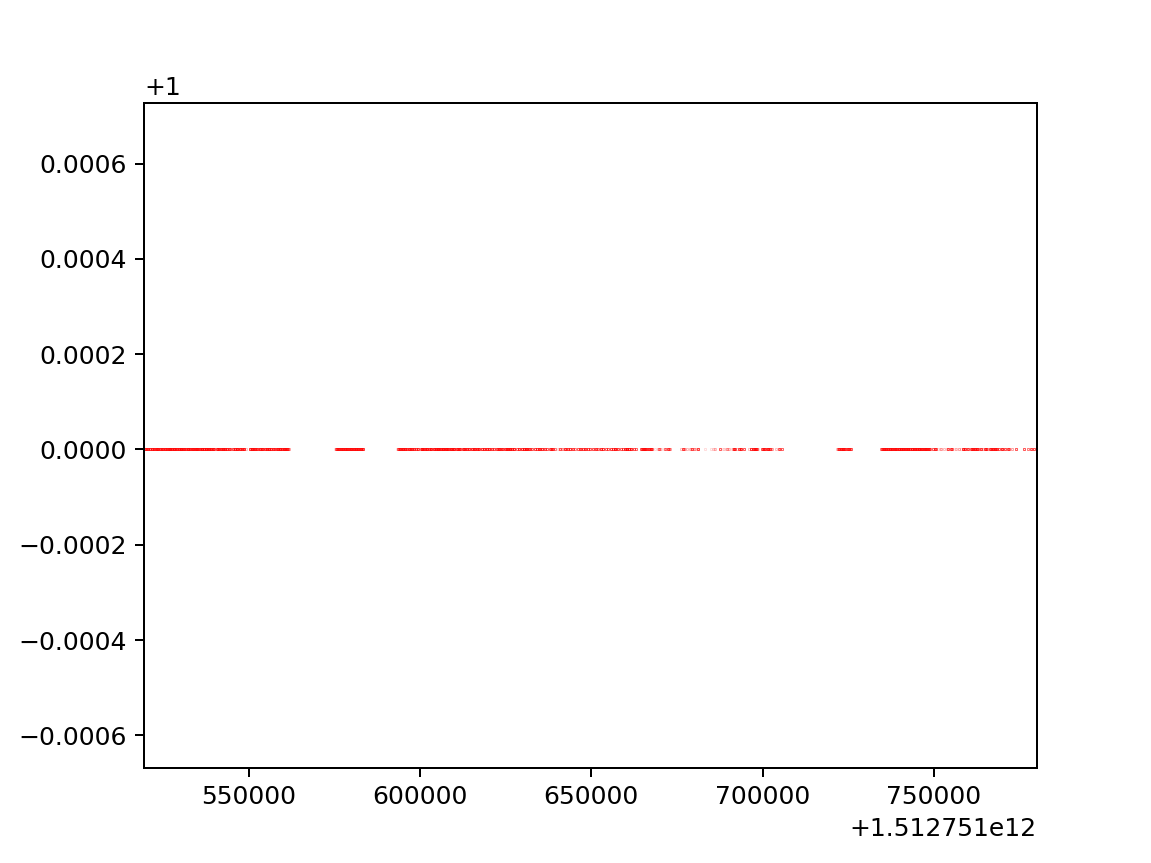

[ 60423  60629  62153  62242  83000 125809 139386]
(139387,)
(179946,)
1512755995823.4805
1512755995798.0
(139387, 6)
(179946, 6)


<IPython.core.display.Javascript object>


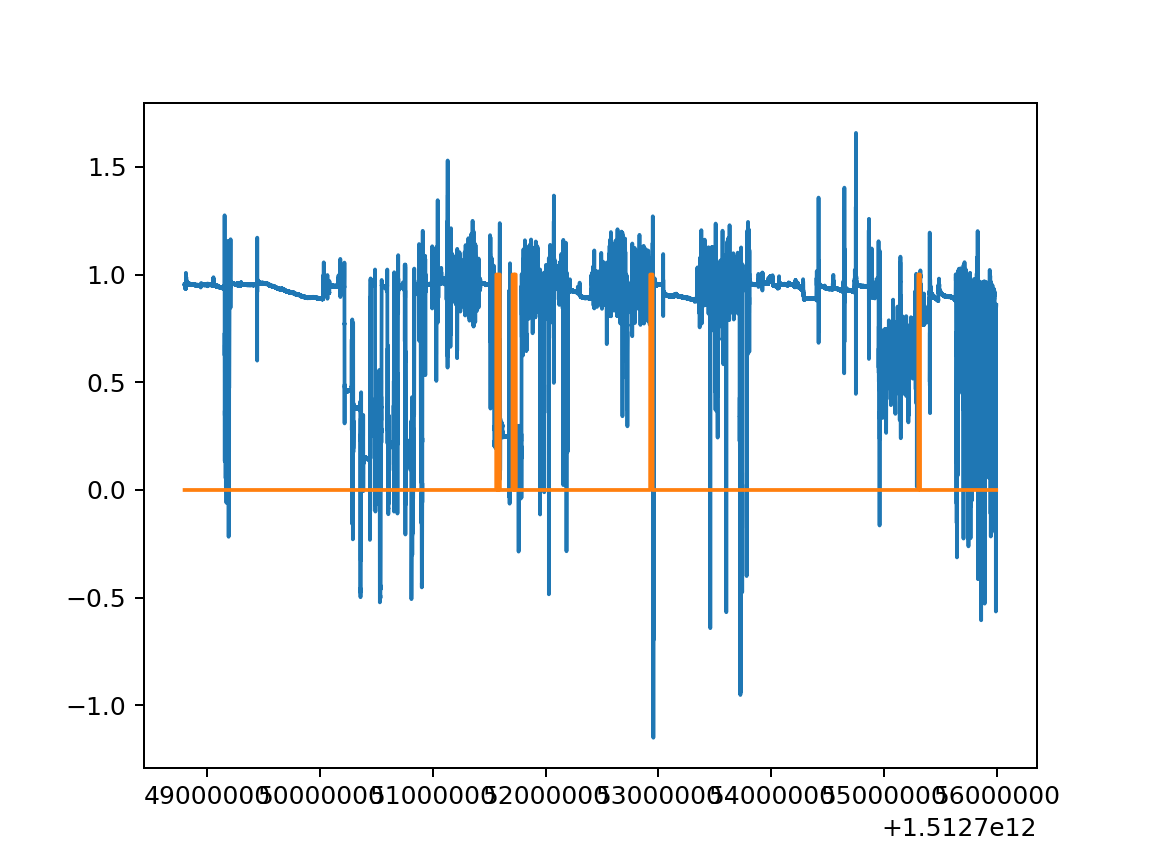

In [609]:
time_l, dl_new,missing_l = preprocess_data(dl)
time_r, dr_new,missing_r = preprocess_data(dr)

In [610]:
#Synchronizing left and right sensor values

dl_new = dl_new[time_l>=max_val,:]
dr_new = dr_new[time_r>=max_val,:]
missing_l = missing_l[time_l>=max_val]
missing_r = missing_r[time_r>=max_val]
time_l = time_l[time_l>=max_val] 
time_r = time_r[time_r>=max_val] 

n_values = time_l.shape[0] - time_r.shape[0]
d = dr_new.shape[1]

if time_l.shape[0] > time_r.shape[0]:
    time_r = np.append(time_r,np.zeros((n_values,)))
    dr_new = np.append(dr_new,np.zeros((n_values,d)),axis = 0)
    missing_r = np.append(missing_r,np.ones((n_values,)))
elif time_l.shape[0] < time_r.shape[0]:
    time_l = np.append(time_l,np.zeros((n_values,)))
    dl_new = np.append(dl_new,np.zeros((n_values,d)), axis = 0)
    missing_l = np.append(missing_l,np.ones((n_values,)))
    
#Reshaping
time_r = time_r.reshape((-1,1))
time_l = time_l.reshape((-1,1))
missing_r = missing_r.reshape((-1,1))
missing_l = missing_l.reshape((-1,1))

#Printing
print(time_r.shape)
print(time_l.shape)
print(dr_new.shape)
print(dl_new.shape)
print(missing_r.shape)
print(missing_l.shape)

(179962, 1)
(179962, 1)
(179962, 6)
(179962, 6)
(179962, 1)
(179962, 1)


In [611]:
dataset = pd.DataFrame(np.concatenate((time_l, dl_new, dr_new, missing_l, missing_r), axis = 1))
dataset.columns = ['time' ,'arx', 'ary', 'arz', 'grx', 'gry', 'grz', 
                   'alx', 'aly', 'alz', 'glx', 'gly', 'glz',
                  'missing_l', 'missing_r']
print(dataset)

                time       arx       ary       arz         grx        gry  \
0       1.512749e+12  0.098877  0.055786  0.908203  269.790649  15.243530   
1       1.512749e+12  0.046122 -0.069058  0.991368  143.744413  19.481909   
2       1.512749e+12  0.021829 -0.189206  1.015874   68.112200  23.395211   
3       1.512749e+12  0.016108 -0.259228  1.012908   36.245009  23.386825   
4       1.512749e+12  0.013398 -0.296907  1.017668   30.555767  18.834846   
5       1.512749e+12 -0.010016 -0.397073  1.073629   19.540839  12.507638   
6       1.512749e+12 -0.019706 -0.372873  1.090406   19.008142  14.462102   
7       1.512749e+12 -0.032868 -0.343844  1.111166   20.557431  19.651858   
8       1.512749e+12 -0.052917 -0.308923  1.142550   22.104815  26.442198   
9       1.512749e+12 -0.082032 -0.264981  1.165905   19.786399  35.281397   
10      1.512749e+12 -0.121963 -0.209991  1.118882    5.686805  50.194662   
11      1.512749e+12 -0.177465 -0.184302  1.004873    2.828357  59.614048   

In [612]:
#Save Dataset
dataset.to_pickle('Participant_3.pkl')

<IPython.core.display.Javascript object>


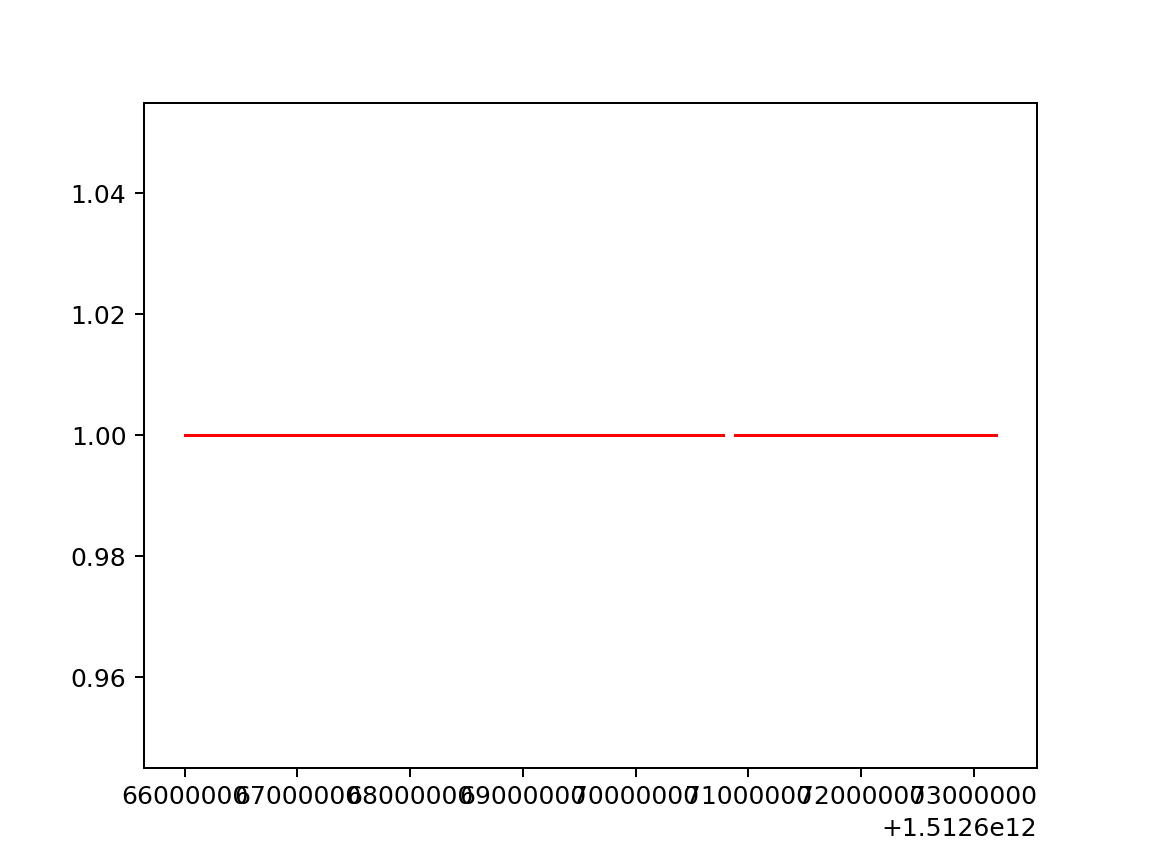

In [419]:
# Plot to visualize missing values
plt.plot(dr.values[:,0],np.ones((l,1)),'r.', ms=0.1)
plt.show()

In [420]:
flag = np.diff(dr.values[:,0])
points = np.where(flag>2000)
Counter(flag)

Counter({0.0: 28197,
         1.0: 45331,
         2.0: 22590,
         3.0: 9770,
         4.0: 3872,
         5.0: 2049,
         6.0: 1184,
         7.0: 802,
         8.0: 566,
         9.0: 421,
         10.0: 317,
         11.0: 217,
         12.0: 189,
         13.0: 176,
         14.0: 127,
         15.0: 99,
         16.0: 75,
         17.0: 56,
         18.0: 30,
         19.0: 34,
         20.0: 26,
         21.0: 30,
         22.0: 22,
         23.0: 19,
         24.0: 7,
         25.0: 15,
         26.0: 13,
         27.0: 10,
         28.0: 9,
         29.0: 10,
         30.0: 6,
         31.0: 5,
         32.0: 9,
         33.0: 7,
         34.0: 13,
         35.0: 13,
         36.0: 12,
         37.0: 21,
         38.0: 22,
         39.0: 34,
         40.0: 62,
         41.0: 31,
         42.0: 40,
         43.0: 38,
         44.0: 32,
         45.0: 28,
         46.0: 26,
         47.0: 18,
         48.0: 11,
         49.0: 12,
         50.0: 7,
         51.0: 3,
     

In [421]:
points=np.append(points[0],l-1) #Appending the last value
print(points)

[ 53854  96819 110230 132855 166436]


In [422]:
prev = 0
delta = 40
new_t = []
for point in points:
    time_diff = (dr['time'].iloc[point] - dr['time'].iloc[prev])/(point-prev)
    new_t.append((np.arange(dr['time'].iloc[prev], dr['time'].iloc[point] + time_diff-1 , time_diff)))
    prev = point+1
new_t = np.concatenate( new_t, axis=0 )
constant_t = (np.arange(new_t[0], new_t[-1] , delta))

In [423]:
print(new_t.shape)
print(constant_t.shape)
print(new_t[-1])
print(constant_t[-1])
print(dr[dr.columns[1:7]].shape)

(166437,)
(179999,)
1512673198930.999
1512673198913.0
(166437, 6)


In [424]:
#f = interpolate.interp1d(new_t, dar_np[:,2:5], axis =0)
f = interpolate.interp1d(new_t, dr[dr.columns[1:7]], axis =0)
dr_new = f(constant_t)
print(dr_new.shape)

(179999, 6)


<IPython.core.display.Javascript object>


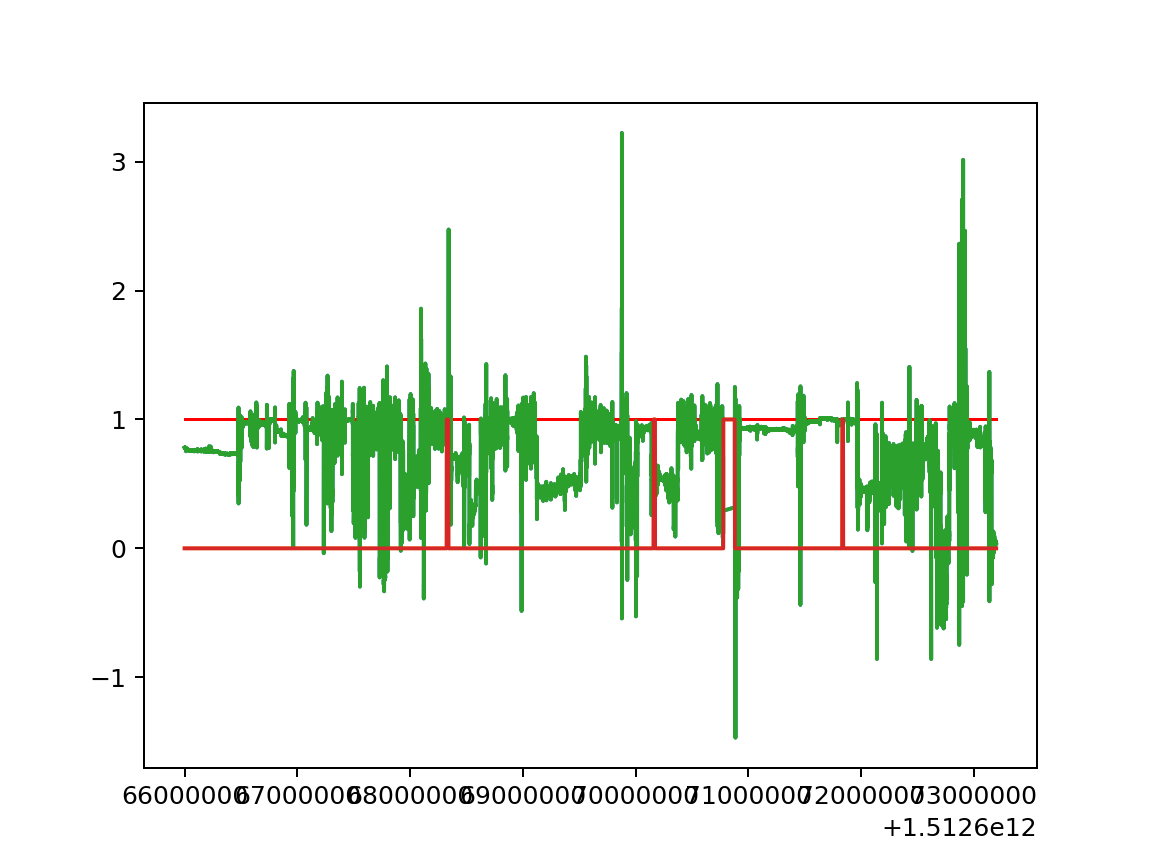

In [427]:
plt.plot(constant_t, dr_new[:,2])
plt.show()

In [426]:
plt.plot(new_t, dar[4])
plt.show()

In [428]:
missing_data = np.zeros((len(constant_t),1))
points = np.where(flag>2000)
for point in points[0]:
    missing_data[np.where((constant_t> dr['time'].iloc[point]) & (constant_t<dr['time'].iloc[point+1]))] = 1
plt.plot(constant_t, missing_data)
plt.show()

In [451]:
dr_new.shape

(179999, 6)

In [461]:
print(time_l[-1])
print(time_r[-1])

1512673198976.0
1512673198913.0


In [462]:
time_r[0] - time_l[0]

57.0

In [475]:
max_val = np.amax((time_r[0], time_l[0]))

In [508]:
dl_new = dl_new[time_l>=max_val,:]
dr_new = dr_new[time_r>=max_val,:]
missing_l = missing_l[time_l>=max_val]
missing_r = missing_r[time_r>=max_val]
time_l = time_l[time_l>=max_val] 
time_r = time_r[time_r>=max_val] 

In [501]:
missing_l.shape[0]

180000

In [509]:
n_values = time_l.shape[0] - time_r.shape[0]
d = dr_new.shape[1]

In [510]:
if time_l.shape[0] > time_r.shape[0]:
    time_r = np.append(time_r,np.zeros((n_values,)))
    dr_new = np.append(dr_new,np.zeros((n_values,d)),axis = 0)
    missing_r = np.append(missing_r,np.ones((n_values,)))
elif time_l.shape[0] < time_r.shape[0]:
    time_l = np.append(time_l,np.zeros((n_values,)))
    dl_new = np.append(dl_new,np.zeros((n_values,d)), axis = 0)
    missing_l = np.append(missing_l,np.ones((n_values,)))

In [522]:
#Reshaping
time_r = time_r.reshape((-1,1))
time_l = time_l.reshape((-1,1))
missing_r = missing_r.reshape((-1,1))
missing_l = missing_l.reshape((-1,1))

In [523]:
print(time_r.shape)
print(time_l.shape)
print(dr_new.shape)
print(dl_new.shape)
print(missing_r.shape)
print(missing_l.shape)

(180000, 1)
(180000, 1)
(180000, 6)
(180000, 6)
(180000, 1)
(180000, 1)


In [497]:
time_temp.shape

(180000,)

In [528]:
np.concatenate((time_l, dl_new, dr_new, missing_l, missing_r), axis = 1).shape


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.512666e+12,-0.020226,-0.043616,1.003371,0.039863,-0.908518,1.937721,-0.173828,0.623169,0.779785,-0.457764,0.686646,0.762939,0.0,0.0
1,1.512666e+12,-0.020452,-0.043485,1.002262,0.007009,-0.880265,1.930857,-0.174733,0.625205,0.779672,-0.486043,0.601806,0.791219,0.0,0.0
2,1.512666e+12,-0.021185,-0.042102,1.002461,-0.010586,-0.837993,2.033141,-0.173451,0.625262,0.782163,-0.605470,0.569051,0.702310,0.0,0.0
3,1.512666e+12,-0.021183,-0.043840,1.003062,-0.024677,-0.852228,2.122285,-0.173599,0.624673,0.782021,-0.661316,0.731204,0.686646,0.0,0.0
4,1.512666e+12,-0.020666,-0.044364,1.002042,0.002482,-0.861501,2.126740,-0.174396,0.624080,0.780911,-0.617471,0.918379,0.697429,0.0,0.0
5,1.512666e+12,-0.020272,-0.043806,1.002336,0.009273,-0.840329,2.091550,-0.175301,0.624365,0.780672,-0.614421,0.986227,0.740561,0.0,0.0
6,1.512666e+12,-0.020757,-0.043784,1.004427,-0.027086,-0.823975,2.081109,-0.174770,0.624224,0.781104,-0.642701,0.974731,0.754394,0.0,0.0
7,1.512666e+12,-0.021425,-0.043373,1.004490,-0.064757,-0.833465,2.080964,-0.174845,0.624139,0.781966,-0.693260,0.991009,0.747681,0.0,0.0
8,1.512666e+12,-0.020924,-0.043428,1.003008,-0.103234,-0.865223,2.070668,-0.175760,0.624036,0.782340,-0.688270,1.047569,0.728758,0.0,0.0
9,1.512666e+12,-0.021427,-0.043296,1.003334,-0.096371,-0.897860,2.105713,-0.175945,0.623286,0.781733,-0.646364,1.057431,0.681150,0.0,0.0


In [ ]:
## Original Version
prev = 0
delta = 40
new_t = []
for point in points:
    time_diff = (dar[0].iloc[point] - dar[0].iloc[prev])/(point-prev)
    new_t.append((np.arange(dar[0].iloc[prev], dar[0].iloc[point] + time_diff-1 , time_diff)))
    prev = point+1
new_t = np.concatenate( new_t, axis=0 )
#new_t = np.append(new_t, dar[0].iloc[-1])
#new_t = np.array(new_t)